<a href="https://colab.research.google.com/github/FelipeRuanMarinheiro/Portifolio/blob/main/Wealth_Management_BI_Custodianship_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estudo Evolução Custódia - Wealth

##Libraries

In [ ]:
#### ESTATISTICA
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### DADOS MF
import yfinance as yf

#### PYTHON
import numpy as np
import pandas as pd

#### GRAFICOS
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

##Obtenção e Tratamento dos Dados

In [ ]:
## BAIXANDO OS DADOS MENSAIS
inicio = "2023-04-01"
ibov1 = yf.download("^BVSP", start=inicio, interval='1mo')["Adj Close"]
ibov = pd.DataFrame(ibov1)
ibov = ibov.rename(columns={"Adj Close": "ibov"})



[*********************100%%**********************]  1 of 1 completed


In [ ]:
ibov

,ibov
Date,
2023-04-01,104432.0
2023-05-01,108335.0
2023-06-01,118087.0
2023-07-01,121943.0
2023-08-01,115742.0
2023-09-01,116565.0
2023-10-01,113144.0
2023-11-01,127331.0
2023-12-01,134185.0


In [ ]:
# Calcular o retorno mensal
ibov['ibov_rm'] = ibov['ibov'].pct_change()

# Calcular o retorno acumulado
ibov['ibov_rac'] = (1 + ibov['ibov_rm']).cumprod() - 1

ibov



,Date,ibov,ibov_rm,ibov_rac
0,2023-04-01,104432.0,NaN,NaN
1,2023-05-01,108335.0,0.037374,0.037374
2,2023-06-01,118087.0,0.090017,0.130755
3,2023-07-01,121943.0,0.032654,0.167678
4,2023-08-01,115742.0,-0.050852,0.108300
5,2023-09-01,116565.0,0.007111,0.116181
6,2023-10-01,113144.0,-0.029348,0.083423
7,2023-11-01,127331.0,0.125389,0.219272
8,2023-12-01,134185.0,0.053828,0.284903
9,2024-01-01,127752.0,-0.047941,0.223303


In [ ]:
PL = pd.read_excel('pl.xlsx')
PL

,pl
0,4.748906e+08
1,NaN
2,4.668625e+08
3,4.734713e+08
4,4.825421e+08
5,4.889085e+08
6,4.856243e+08
7,4.784649e+08
8,4.953374e+08
9,5.185477e+08


In [ ]:
# Calcular o retorno mensal
PL['pl_rm'] = PL['pl'].pct_change()

# Calcular o retorno acumulado
PL['pl_rac'] = (1 + PL['pl_rm']).cumprod() - 1

PL

,index,pl,pl_rm,pl_rac
0,0,4.748906e+08,NaN,NaN
1,1,NaN,0.000000,0.000000
2,2,4.668625e+08,-0.016905,-0.016905
3,3,4.734713e+08,0.014156,-0.002989
4,4,4.825421e+08,0.019158,0.016112
5,5,4.889085e+08,0.013194,0.029518
6,6,4.856243e+08,-0.006718,0.022602
7,7,4.784649e+08,-0.014743,0.007527
8,8,4.953374e+08,0.035264,0.043056
9,9,5.185477e+08,0.046858,0.091931


In [ ]:
#Dataframe merged PL e IBOV

df = pd.read_excel('df.xlsx')
df

,Date,ibov,ibov_rm,ibov_rac,pl,pl_rm,pl_rac
0,2023-05-01,108335.0,0.000000,0.000000,4.748906e+08,0.000000,0.000000
1,2023-06-01,118087.0,0.090017,0.130755,4.668625e+08,-0.016905,-0.016905
2,2023-07-01,121943.0,0.032654,0.167678,4.734713e+08,0.014156,-0.002989
3,2023-08-01,115742.0,-0.050852,0.108300,4.825421e+08,0.019158,0.016112
4,2023-09-01,116565.0,0.007111,0.116181,4.889085e+08,0.013194,0.029518
5,2023-10-01,113144.0,-0.029348,0.083423,4.856243e+08,-0.006718,0.022602
6,2023-11-01,127331.0,0.125389,0.219272,4.784649e+08,-0.014743,0.007527
7,2023-12-01,134185.0,0.053828,0.284903,4.953374e+08,0.035264,0.043056
8,2024-01-01,127752.0,-0.047941,0.223303,5.185477e+08,0.046858,0.091931
9,2024-02-01,129020.0,0.009925,0.235445,5.344174e+08,0.030604,0.125348


In [ ]:
df.set_index('Date', inplace=True)
df

,ibov,ibov_rm,ibov_rac,pl,pl_rm,pl_rac
Date,,,,,,
2023-05-01,108335.0,0.000000,0.000000,4.748906e+08,0.000000,0.000000
2023-06-01,118087.0,0.090017,0.130755,4.668625e+08,-0.016905,-0.016905
2023-07-01,121943.0,0.032654,0.167678,4.734713e+08,0.014156,-0.002989
2023-08-01,115742.0,-0.050852,0.108300,4.825421e+08,0.019158,0.016112
2023-09-01,116565.0,0.007111,0.116181,4.889085e+08,0.013194,0.029518
2023-10-01,113144.0,-0.029348,0.083423,4.856243e+08,-0.006718,0.022602
2023-11-01,127331.0,0.125389,0.219272,4.784649e+08,-0.014743,0.007527
2023-12-01,134185.0,0.053828,0.284903,4.953374e+08,0.035264,0.043056
2024-01-01,127752.0,-0.047941,0.223303,5.185477e+08,0.046858,0.091931


##Análise dos Dados

###Evolução IBOV e Retorno Acumulado Custódia Wealth

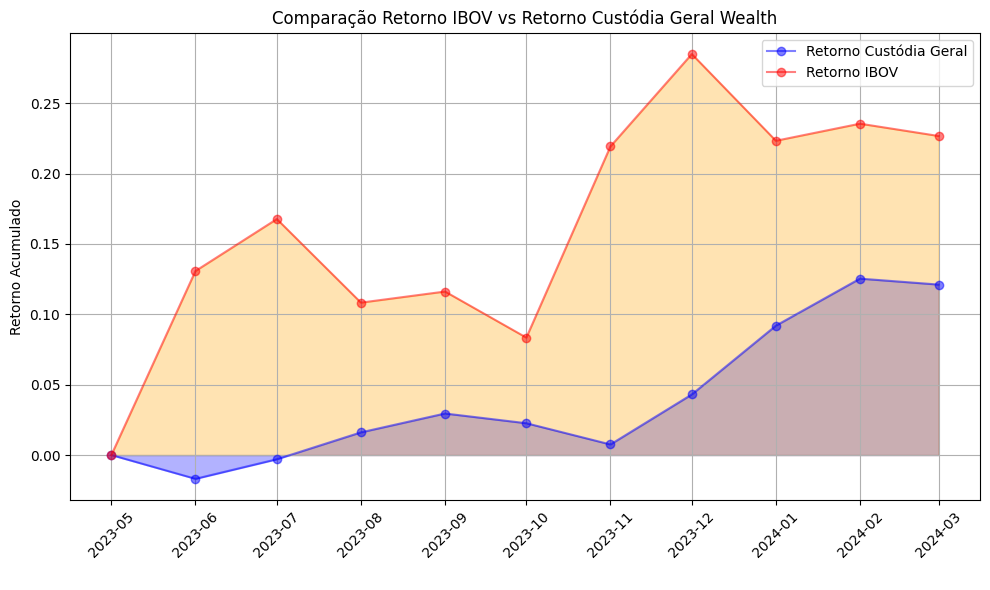

In [ ]:
import matplotlib.pyplot as plt

# Criar um gráfico
plt.figure(figsize=(10, 6))

# Preencher a área abaixo da linha 'pl_rac' com a cor azul
plt.fill_between(df.index, df['pl_rac'], color='blue', alpha=0.3)  # Especifica a cor e a transparência

# Preencher a área abaixo da linha 'ibov_rac' com a cor laranja
plt.fill_between(df.index, df['ibov_rac'], color='orange', alpha=0.3)  # Especifica a cor e a transparência

# Plotar as linhas para pl_rac e ibov_rac
plt.plot(df.index, df['pl_rac'], label='Retorno Custódia Geral', marker='o', color='blue', alpha=0.5)
plt.plot(df.index, df['ibov_rac'], label='Retorno IBOV', marker='o', color='red', alpha=0.5)

# Adicionar legendas e rótulos
plt.legend()
plt.title('Comparação Retorno IBOV vs Retorno Custódia Geral Wealth')
plt.xlabel(' ')
plt.ylabel('Retorno Acumulado')

# Mostrar o gráfico
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





**INTERPRETAÇÃO:**

Observando esse gráfico podemos inferir uma maior predominancia em perfis de clientes conservadores e moderados que compõe essa carteira.


### BETA Carteira em relação ao IBOV

In [ ]:
# Selecionar as colunas necessárias
retorno_portfolio = df['pl_rac']
retorno_mercado = df['ibov_rac']

# Calcular a covariância entre os retornos do portfólio e do mercado
covariancia = retorno_portfolio.cov(retorno_mercado)

# Calcular a variância do retorno do mercado
variancia_mercado = retorno_mercado.var()

# Calcular o beta
beta = covariancia / variancia_mercado

print("Beta da Custódia em relação ao IBOV:", beta)


Beta da Custódia em relação ao IBOV: 0.347473275969127


INTERPRETAÇÃO:


O beta é uma medida que indica o quanto os retornos de um ativo se movem em resposta aos movimentos do mercado, representado por um índice como o IBOV. No caso do beta ser maior que 1, isso sugere que o ativo é mais volátil do que o mercado. Por exemplo, se o IBOV sobe 1%, espera-se que esse ativo suba mais do que 1%. Da mesma forma, se o IBOV cai 1%, espera-se que o ativo caia mais do que 1%.

Por outro lado, se o beta é menor que 1, isso indica que o ativo é menos volátil do que o mercado. Por exemplo, se o IBOV sobe 1%, espera-se que o ativo suba menos do que 1%. Da mesma forma, se o IBOV cai 1%, espera-se que o ativo caia menos do que 1%.

No caso do beta ser de aproximadamente 0.347, isso sugere que o ativo é menos volátil do que o mercado representado pelo IBOV. Assim, quando o IBOV sobe ou cai, espera-se que esse ativo tenha movimentos menores em termos percentuais.

###Downside Risk

In [ ]:
# Selecionar os retornos negativos da carteira
retornos_negativos = df['pl_rac'][df['pl_rac'] < 0]

# Calcular o Downside Risk
downside_risk = (retornos_negativos ** 2).mean() ** 0.5

print("Downside Risk da carteira:", downside_risk)

Downside Risk da carteira: 0.012139189237424516


**INTERPRETAÇÃO**

O Downside Risk é uma medida de risco que se concentra exclusivamente nos retornos negativos da sua carteira. O valor que você obteve, de aproximadamente 0.012, representa o desvio padrão dos retornos negativos da sua carteira.

Em termos mais simples, isso significa que, em média, quando sua carteira experimenta retornos negativos, a magnitude desses retornos negativos tende a ser em torno de 1.2% (ou 0.012 em termos percentuais) do valor do seu patrimônio líquido. Quanto maior o valor do Downside Risk, maior é a magnitude dos retornos negativos experimentados pela carteira em relação ao seu patrimônio líquido.

Essa medida é valiosa para investidores que desejam entender melhor o risco de perdas significativas em sua carteira, focando especificamente nos retornos negativos.

###DRAWDOWN

O Maximum Drawdown é uma medida que representa a maior queda percentual entre o pico anterior e o mínimo subsequente de um investimento ou índice. Ele indica a magnitude da perda máxima que um investidor poderia ter experimentado em um determinado período.

No gráfico, temos duas linhas representando o Maximum Drawdown da Carteira e do Índice Ibovespa ao longo do tempo. Quando o valor de uma dessas linhas está próximo de zero, significa que a carteira ou o índice está em seu melhor desempenho relativo desde o último pico, sem grandes quedas significativas.

Por outro lado, quando o valor de uma dessas linhas aumenta, indica que a carteira ou o índice experimentaram uma queda significativa em relação ao seu pico anterior. Quanto maior for o valor do Maximum Drawdown, maior foi a queda máxima em relação ao pico anterior.

Portanto, ao observar o gráfico, os investidores podem avaliar o risco de perdas significativas em suas carteiras ou no índice, identificando períodos de grandes quedas e analisando a magnitude dessas quedas em relação ao pico anterior.

In [ ]:
# Calcular o drawdown para a carteira e o IBOV
carteira_cummax = df['pl'].cummax()
carteira_drawdown = (df['pl'] - carteira_cummax) / carteira_cummax

ibov_cummax = df['ibov'].cummax()
ibov_drawdown = (df['ibov'] - ibov_cummax) / ibov_cummax

# Criar um DataFrame com os drawdowns
drawdown = pd.DataFrame({
    'Data': df.index,
    'Drawdown': carteira_drawdown,
    'Drawdown_ibov': ibov_drawdown
})

# Criar o gráfico com Plotly
fig = go.Figure()

# Adicionar as linhas de Maximum Drawdown da Carteira e do Ibovespa
fig.add_trace(go.Scatter(x=drawdown['Data'], y=drawdown['Drawdown'],
                         mode='lines',
                         name="Maximum Drawdown da Carteira",
                         fill='tozeroy'))

fig.add_trace(go.Scatter(x=drawdown['Data'], y=drawdown['Drawdown_ibov'],
                         mode='lines',
                         name="Maximum Drawdown do Índice Ibovespa",
                         fill='tozeroy'))

# Personalizar o layout do gráfico
fig.update_layout(
    title='Evolução do Maximum Drawdown da Carteira e do Ibovespa ao Longo do Tempo',
    xaxis_title=' ',
    yaxis_title='Maximum Drawdown (%)',
    paper_bgcolor='white',
    plot_bgcolor='white',
    width=900,
    height=500,
    yaxis=dict(tickformat=".2%")
)

# Exibir o gráfico
fig.show()


###Value at Risk (VaR)

####Value at Risk (VaR) - HISTORICO





#####Value at Risk (VaR) - HISTORICO - PORTIFOLIO


In [ ]:
# Calculando o VaR histórico para o portfólio
var_90 = round(np.percentile(df['pl_rac'], 10), 2)
var_95 = round(np.percentile(df['pl_rac'], 5), 2)
var_99 = round(np.percentile(df['pl_rac'], 1), 2)

print(f'Com 90% de confiança a queda máxima de um dia do portfólio será de {var_90}%')
print(f'Com 95% de confiança a queda máxima de um dia do portfólio será de {var_95}%')
print(f'Com 99% de confiança a queda máxima de um dia do portfólio será de {var_99}%')


Com 90% de confiança a queda máxima de um dia do portfólio será de -0.0%
Com 95% de confiança a queda máxima de um dia do portfólio será de -0.01%
Com 99% de confiança a queda máxima de um dia do portfólio será de -0.02%


#####Value at Risk (VaR) - HISTORICO - IBOV

In [ ]:
# Calculando o VaR histórico para o IBOV
var_90_ibov = round(np.percentile(df['ibov_rac'], 10), 2)
var_95_ibov = round(np.percentile(df['ibov_rac'], 5), 2)
var_99_ibov = round(np.percentile(df['ibov_rac'], 1), 2)

print(f'Com 90% de confiança a queda máxima de um dia do Ibovespa será de {var_90_ibov}%')
print(f'Com 95% de confiança a queda máxima de um dia do Ibovespa será de {var_95_ibov}%')
print(f'Com 99% de confiança a queda máxima de um dia do Ibovespa será de {var_99_ibov}%')

Com 90% de confiança a queda máxima de um dia do Ibovespa será de 0.08%
Com 95% de confiança a queda máxima de um dia do Ibovespa será de 0.04%
Com 99% de confiança a queda máxima de um dia do Ibovespa será de 0.01%


####Value at Risk (VaR) - PARAMETRICO


**INTERPRETAÇÃO:**

Vale ressaltar que estes dados tratam-se apenas de um exemplo ficticio trabalhados em cima de dados anonimos colhidos na internet. O horizonte de tempo dos testes é demasiado pequeno para obtermos parametros acurados.

O intuito é apenas realizar uma analise sobre os dados colhidos, sem a necessidade de uma acurácia estatistica.

#####Value at Risk (VaR) - PARAMETRICO - PORTIFOLIO


In [ ]:
# Calculando o VaR paramétrico para o portfólio
media_ret_carteira = np.mean(df['pl_rac'])
vol_carteira_diaria = np.std(df['pl_rac'])

var_90_parametrico = round(norm.ppf(1 - 0.90, loc=media_ret_carteira, scale=vol_carteira_diaria)*100, 2)
var_95_parametrico = round(norm.ppf(1 - 0.95, loc=media_ret_carteira, scale=vol_carteira_diaria)*100, 2)
var_99_parametrico = round(norm.ppf(1 - 0.99, loc=media_ret_carteira, scale=vol_carteira_diaria)*100, 2)

print(f'Existe 10% de probabilidade do portfólio sofrer perdas superiores à {var_90_parametrico}%, em um dia')
print(f'Existe 5% de probabilidade do portfólio sofrer perdas superiores à {var_95_parametrico}%, em um dia')
print(f'Existe 1% de probabilidade do portfólio sofrer perdas superiores à {var_99_parametrico}%, em um dia')

Existe 10% de probabilidade do portfólio sofrer perdas superiores à -2.17%, em um dia
Existe 5% de probabilidade do portfólio sofrer perdas superiores à -3.91%, em um dia
Existe 1% de probabilidade do portfólio sofrer perdas superiores à -7.18%, em um dia


#####Value at Risk (VaR) - PARAMETRICO - IBOV

In [ ]:
# Calculando o VaR paramétrico para o IBOV
media_ret_ibov = np.mean(df['ibov_rac'])
vol_ibov_diaria = np.std(df['ibov_rac'])

var_90_parametrico_ibov = round(norm.ppf(1 - 0.90, loc=media_ret_ibov, scale=vol_ibov_diaria)*100, 2)
var_95_parametrico_ibov = round(norm.ppf(1 - 0.95, loc=media_ret_ibov, scale=vol_ibov_diaria)*100, 2)
var_99_parametrico_ibov = round(norm.ppf(1 - 0.99, loc=media_ret_ibov, scale=vol_ibov_diaria)*100, 2)

print(f'Existe 10% de probabilidade do Ibovespa sofrer perdas superiores à {var_90_parametrico_ibov}%, em um dia')
print(f'Existe 5% de probabilidade do Ibovespa sofrer perdas superiores à {var_95_parametrico_ibov}%, em um dia')
print(f'Existe 1% de probabilidade do Ibovespa sofrer perdas superiores à {var_99_parametrico_ibov}%, em um dia')

Existe 10% de probabilidade do Ibovespa sofrer perdas superiores à 6.1%, em um dia
Existe 5% de probabilidade do Ibovespa sofrer perdas superiores à 3.19%, em um dia
Existe 1% de probabilidade do Ibovespa sofrer perdas superiores à -2.25%, em um dia


####Value at Risk (VaR) - MONTE CARLO

#####Value at Risk (VaR) - Monte Carlo - IBOV

In [ ]:
import numpy as np

# Número de simulações e de meses
num_simulacoes = 10000
num_meses = len(df)

# Simulações de retornos
retornos_simulados_ibov = []

for _ in range(num_simulacoes):
    retornos_mes_ibov = np.random.normal(df['ibov_rm'].mean(), df['ibov_rm'].std(), num_meses)
    retornos_simulados_ibov.append(retornos_mes_ibov)

# Calcular o retorno final para cada simulação
retornos_finais_ibov = np.prod(1 + np.array(retornos_simulados_ibov), axis=1) - 1

# Calcular VaR
var_90_mt_carlo_ibov = round(np.percentile(retornos_finais_ibov, 10) * 100, 2)
var_95_mt_carlo_ibov = round(np.percentile(retornos_finais_ibov, 5) * 100, 2)
var_99_mt_carlo_ibov = round(np.percentile(retornos_finais_ibov, 1) * 100, 2)

print(f'Com 90% de confiança, a queda máxima do IBOV será de {var_90_mt_carlo_ibov}%')
print(f'Com 95% de confiança, a queda máxima do IBOV será de {var_95_mt_carlo_ibov}%')
print(f'Com 99% de confiança, a queda máxima do IBOV será de {var_99_mt_carlo_ibov}%')


Com 90% de confiança, a queda máxima do IBOV será de -6.38%
Com 95% de confiança, a queda máxima do IBOV será de -12.7%
Com 99% de confiança, a queda máxima do IBOV será de -23.2%


**INTERPRETAÇÃO:**

Com 90% de confiança, a queda máxima do IBOV será de -6.38%: Isso significa que há uma probabilidade de 90% de que a queda máxima do IBOV seja de até 6.38% em um determinado período. Em outras palavras, em 90% dos casos, espera-se que o IBOV não caia mais do que 6.38%.

Com 95% de confiança, a queda máxima do IBOV será de -12.7%: Com 95% de confiança, espera-se que a queda máxima do IBOV seja de até 12.7%. Isso indica que em 95% dos cenários, o IBOV não cairá mais do que 12.7%.


Com 99% de confiança, a queda máxima do IBOV será de -23.2%: Isso significa que há uma probabilidade de 99% de que a queda máxima do IBOV seja de até 23.2%. Em outras palavras, em 99% dos casos, espera-se que o IBOV não caia mais do que 23.2%.

#####Value at Risk (VaR) - Monte Carlo - PORTIFOLIO

In [ ]:
# Número de simulações e de meses
num_simulacoes = 10000
num_meses = len(df)

# Simulações de retornos
retornos_simulados = []

for _ in range(num_simulacoes):
    retornos_mes = np.random.normal(df['pl_rm'].mean(), df['pl_rm'].std(), num_meses)
    retornos_simulados.append(retornos_mes)

# Calcular o retorno final para cada simulação
retornos_finais = np.prod(1 + np.array(retornos_simulados), axis=1) - 1

# Calcular VaR
var_90_mt_carlo = round(np.percentile(retornos_finais, 10) * 100, 2)
var_95_mt_carlo = round(np.percentile(retornos_finais, 5) * 100, 2)
var_99_mt_carlo = round(np.percentile(retornos_finais, 1) * 100, 2)

print(f'Com 90% de confiança, a queda máxima do patrimônio líquido será de {var_90_mt_carlo}%')
print(f'Com 95% de confiança, a queda máxima do patrimônio líquido será de {var_95_mt_carlo}%')
print(f'Com 99% de confiança, a queda máxima do patrimônio líquido será de {var_99_mt_carlo}%')


Com 90% de confiança, a queda máxima do patrimônio líquido será de 2.65%
Com 95% de confiança, a queda máxima do patrimônio líquido será de 0.13%
Com 99% de confiança, a queda máxima do patrimônio líquido será de -4.52%


**INTERPRETAÇÃO**

Com 90% de confiança, a queda máxima do patrimônio líquido será de 2.65%: Isso significa que há uma probabilidade de 90% de que a queda máxima do patrimônio líquido do portfólio seja de até 2.65% em um determinado período. Em outras palavras, em 90% dos casos, espera-se que o patrimônio líquido não caia mais do que 2.65%.

Com 95% de confiança, a queda máxima do patrimônio líquido será de 0.13%: Com 95% de confiança, espera-se que a queda máxima do patrimônio líquido do portfólio seja de até 0.13%. Isso indica que em 95% dos cenários, o patrimônio líquido não cairá mais do que 0.13%.

Com 99% de confiança, a queda máxima do patrimônio líquido será de -4.52%: Isso significa que há uma probabilidade de 99% de que a queda máxima do patrimônio líquido do portfólio seja de até -4.52%. Em outras palavras, em 99% dos casos, espera-se que o patrimônio líquido não caia mais do que -4.52%.